In [2]:
%pip install -r req.txt

  Using cached numpy-2.2.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.15.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 35.0 MB/s eta 0:00:00 0:00:01
Using cached numpy-2.2.2-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Using cached p

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# Question 1

In [7]:
import numpy as np

def kmeans_clustering(data, k, max_iters=100):
    """
    Implements K-means clustering algorithm
    
    Parameters:
    data: numpy array of shape (n_samples, n_features)
    k: number of clusters
    max_iters: maximum number of iterations
    
    Returns:
    centroids: numpy array of shape (k, n_features)
    labels: numpy array of shape (n_samples,)
    """
    # Get dimensions of the data
    n_samples, n_features = data.shape
    
    # Initialize centroids randomly by selecting k random data points
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[random_indices]
    
    for _ in range(max_iters):
        # Store old centroids to check for convergence
        old_centroids = centroids.copy()
        
        # Calculate distances between each point and all centroids
        distances = np.sqrt(((data[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        
        # Assign each point to nearest centroid
        labels = np.argmin(distances, axis=1)
        
        # Update centroids by taking mean of all points assigned to each cluster
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)
        
        # Check for convergence
        if np.all(old_centroids == centroids):
            break
            
    return centroids, labels

# Test the implementation on breast cancer dataset
X = dataset.data
k = 2  # Since we know there are 2 classes (malignant/benign)

# Normalize the data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Run K-means
centroids, labels = kmeans_clustering(X_normalized, k)

In [10]:
# Analyze different K values
k_values = range(2, 8)  # K from 2 to 7
inertias = []  # Within-cluster sum of squares (WCSS)

for k in k_values:
    centroids, labels = kmeans_clustering(X_normalized, k)
    
    # Calculate inertia (WCSS) for this K
    distances = np.sqrt(((X_normalized[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    min_distances = np.min(distances, axis=1)
    inertia = np.sum(min_distances ** 2)
    inertias.append(inertia)

# Print the inertia values
for k, inertia in zip(k_values, inertias):
    print(f"K={k}: Inertia={inertia:.2f}")

K=2: Inertia=11595.68
K=3: Inertia=10065.44
K=4: Inertia=9333.18
K=5: Inertia=8564.50
K=6: Inertia=8288.61
K=7: Inertia=7688.19


In [ ]:
# Justification for using normalized data (X_normalized):
# 1. The breast cancer dataset features have different scales and units
# 2. Features with larger scales would dominate the distance calculations in K-means
# 3. Normalization (standardization) ensures:
#       a. All features contribute equally to distance calculations
#       b. Features are centered around 0 with standard deviation of 1
#       c. More reliable and interpretable clustering results

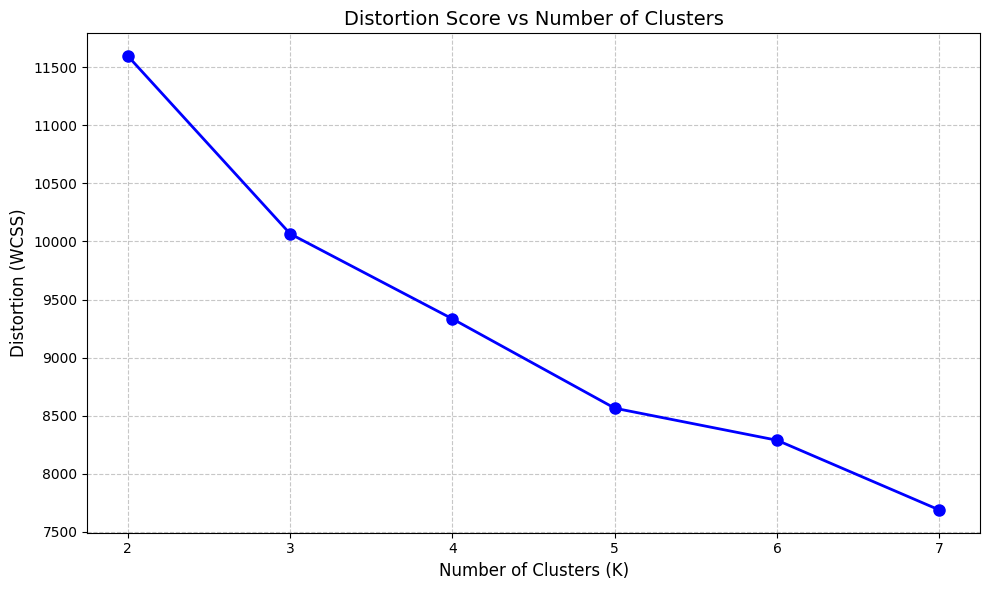

In [12]:
import matplotlib.pyplot as plt

# Plot the distortion (inertia) curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Distortion (WCSS)', fontsize=12)
plt.title('Distortion Score vs Number of Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)  # Force x-axis to show all K values
plt.tight_layout()
plt.show()

In [ ]:
# K = 3
# 1. from the elbow curve, the rate of decrease becomes notably more gradual after K=3. Thus, it suggests that adding more clusters beyond this point gives diminishing returns.
# 2. more clusters means more noise and more likely to overfit. And the dataset itself has 2 actual classes, so 2 + 1 more cluster to capture any subgroups is enough.

In [ ]:
# Question 2

In [15]:
import numpy as np

# Define the dataset
X = np.array([1, 2, 3, 4])
N = len(X)
K = 2

def calculate_risk(X, labels, centroids):
    """Calculate the risk (objective function) J"""
    risk = 0
    for n in range(len(X)):
        risk += (X[n] - centroids[labels[n]]) ** 2
    return risk / len(X)

def kmeans_step(X, centroids):
    """Perform one step of K-means (assignment and update)"""
    # Assignment step
    labels = np.zeros(len(X), dtype=int)
    for n in range(len(X)):
        # Calculate distances to both centroids
        distances = [abs(X[n] - centroid) for centroid in centroids]
        # Assign to nearest centroid (if equal, assign to smaller index as per rule)
        labels[n] = np.argmin(distances)
    
    # Update step
    new_centroids = np.zeros(K)
    for k in range(K):
        if np.sum(labels == k) > 0:  # If cluster is not empty
            new_centroids[k] = np.mean(X[labels == k])
        else:
            new_centroids[k] = centroids[k]
    
    return labels, new_centroids

# Initialize with given centroids
centroids = np.array([2, 4])
print("Initial centroids:", centroids)

# Run K-means until convergence
iteration = 1
while True:
    print(f"\nIteration {iteration}:")
    
    # Store old centroids to check convergence
    old_centroids = centroids.copy()
    
    # Perform K-means step
    labels, centroids = kmeans_step(X, centroids)
    
    # Print current state
    print("Point assignments:", labels)
    print("Updated centroids:", centroids)
    print("Current risk:", calculate_risk(X, labels, centroids))
    
    # Check for convergence
    if np.all(old_centroids == centroids):
        print("\nConverged!")
        break
    
    iteration += 1

print("\nFinal solution:")
print("Final centroids:", centroids)
print("Final assignments:", labels)
print("Final risk:", calculate_risk(X, labels, centroids))

# Calculate optimal solution
print("\nOptimal solution:")
optimal_centroids = np.array([1.5, 3.5])
optimal_labels = np.array([0, 0, 1, 1])
optimal_risk = calculate_risk(X, optimal_labels, optimal_centroids)
print("Optimal centroids:", optimal_centroids)
print("Optimal assignments:", optimal_labels)
print("Optimal risk:", optimal_risk)

print("\nComparison:")
if calculate_risk(X, labels, centroids) > optimal_risk:
    print(f"The converged solution has {calculate_risk(X, labels, centroids)/optimal_risk:.2f}x " 
      f"higher risk than the optimal solution")
else:
    print(f"The converged solution has {optimal_risk/calculate_risk(X, labels, centroids):.2f}x " 
      f"lower risk than the optimal solution")

Initial centroids: [2 4]

Iteration 1:
Point assignments: [0 0 0 1]
Updated centroids: [2. 4.]
Current risk: 0.5

Converged!

Final solution:
Final centroids: [2. 4.]
Final assignments: [0 0 0 1]
Final risk: 0.5

Optimal solution:
Optimal centroids: [1.5 3.5]
Optimal assignments: [0 0 1 1]
Optimal risk: 0.25

Comparison:
The converged solution has 2.00x higher risk than the optimal solution


In [ ]:
# Question 3

In [16]:
import numpy as np

# Given data points
X = np.array([1.76, 3.60, -2.20, 2.22, 1.45])

# MLE for mean (μ) is the sample mean
mu_mle = np.mean(X)

# MLE for variance (σ²) is the sample variance with n divisor (not n-1)
sigma2_mle = np.sum((X - mu_mle)**2) / len(X)

print(f"Maximum Likelihood Estimates:")
print(f"μ (mean) = {mu_mle:.4f}")
print(f"σ² (variance) = {sigma2_mle:.4f}")

Maximum Likelihood Estimates:
μ (mean) = 1.3660
σ² (variance) = 3.7197


In [ ]:
# Question 4

In [21]:
import numpy as np

# Define matrix A
A = np.array([
    [2, -1, 4],
    [1, 1, 1],
    [4, 1, 2]
])

eigenvalues = np.linalg.eigvals(A)
print(f"Eigenvalues: {eigenvalues}")

# Let's expand det(A - λI):
# |2-λ  -1    4  |
# |1     1-λ  1  |
# |4     1    2-λ|

# Using cofactor expansion along first row:
# (2-λ)[(1-λ)(2-λ) - 1] - (-1)[1(2-λ) - 4·1] + 4[1·1 - (1-λ)·4]

# Let's break it down:
# Term 1: (2-λ)[(1-λ)(2-λ) - 1]
#       = (2-λ)[2-3λ+λ² - 1]
#       = (2-λ)(λ² - 3λ + 1)
#       = 2λ² - 6λ + 2 - λ³ + 3λ² - λ
#       = -λ³ + 5λ² - 7λ + 2

# Term 2: -(-1)[1(2-λ) - 4]
#       = 2-λ - 4
#       = -λ - 2

# Term 3: 4[1 - (1-λ)·4]
#       = 4[1 - 4 + 4λ]
#       = 4[-3 + 4λ]
#       = -12 + 16λ

# Combining all terms:
# (-λ³ + 5λ² - 7λ + 2) + (-λ - 2) + (-12 + 16λ)
# = -λ³ + 5λ² + 8λ - 12

# This polynomial should have roots at λ = 1, -2, and 6
# Therefore: -λ³ + 5λ² + 8λ - 12 = -(λ - 1)(λ + 2)(λ - 6)

print("\nCharacteristic polynomial: -λ³ + 5λ² + 8λ - 12")
print("                         = -(λ - 1)(λ + 2)(λ - 6)")
print("\nEigenvalues are:")
print("λ₁ = 1")
print("λ₂ = -2")
print("λ₃ = 6")

Eigenvalues: [ 6. -2.  1.]

Characteristic polynomial: -λ³ + 5λ² + 8λ - 12
                         = -(λ - 1)(λ + 2)(λ - 6)

Eigenvalues are:
λ₁ = 1
λ₂ = -2
λ₃ = 6
